In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
pd.set_option('display.max_columns', None)

In [146]:
df = pd.read_csv('House_data_v3.csv').drop_duplicates()
df.head()

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
0,flat,Super built-up Area,Under Construction,electronic city phase ii,2,1056.0,2,1,3693.0,0.39,897.60
1,house,Plot Area,Ready To Move,chikka tirupathi,4,2600.0,5,3,4615.0,1.20,2600.00
2,flat,Built-up Area,Ready To Move,uttarahalli,3,1440.0,2,3,4306.0,0.62,1440.00
3,flat,Super built-up Area,Ready To Move,lingadheeranahalli,3,1521.0,3,1,6246.0,0.95,1292.85
4,flat,Super built-up Area,Ready To Move,kothanur,2,1200.0,2,1,4250.0,0.51,1020.00


In [147]:
df.shape

(11793, 11)

In [148]:
df[df['price_per_sqft'] > 50000].sort_values('price_per_sqft',ascending=False)

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
8534,house,Plot Area,Ready To Move,ramamurthy nagar,1,1.0,1,1,4800000.0,0.48,1.0
4594,flat,Built-up Area,Ready To Move,other,7,5.0,7,3,2300000.0,1.15,5.0
333,house,Plot Area,Under Construction,other,3,11.0,3,2,672727.0,0.74,11.0
1057,flat,Built-up Area,Ready To Move,other,5,24.0,2,2,625000.0,1.50,24.0
10397,house,Plot Area,Under Construction,whitefield,4,60.0,4,2,363333.0,2.18,60.0
964,flat,Carpet Area,Ready To Move,other,1,15.0,1,0,200000.0,0.30,16.5
6995,flat,Built-up Area,Ready To Move,other,1,425.0,1,1,176471.0,7.50,425.0
5215,flat,Built-up Area,Ready To Move,judicial layout,5,405.0,6,3,98765.0,4.00,405.0
6491,flat,Built-up Area,Ready To Move,other,1,650.0,1,3,76923.0,5.00,650.0
5888,house,Plot Area,Under Construction,bommenahalli,4,2940.0,3,2,76531.0,22.50,2940.0


In [149]:
df = df[df['price_per_sqft'] <= 100000]

In [150]:
df.shape

(11786, 11)

In [151]:
x = df[df['price_per_sqft'] <= 25000]
(x['area']/x['bedroom']).quantile(0.05)

np.float64(280.0)

In [152]:
df[(df['area']/df['bedroom'])<300].sample(5)

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
1294,house,Plot Area,Ready To Move,marathahalli,5,1350.0,4,1,10000.0,1.35,1350.0
1862,house,Plot Area,Ready To Move,chamrajpet,4,1080.0,4,2,23148.0,2.50,1080.0
8979,house,Plot Area,Under Construction,other,5,800.0,5,1,11875.0,0.95,800.0
9927,flat,Super built-up Area,Ready To Move,other,7,1200.0,5,2,16667.0,2.00,1020.0
8197,flat,Super built-up Area,Ready To Move,marsur,3,720.0,2,1,4444.0,0.32,612.0


In [153]:
df[df.area/df.bedroom<300].head()

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
51,house,Plot Area,Ready To Move,murugeshpalya,6,1407.0,4,1,10661.0,1.50,1407.0
61,house,Plot Area,Ready To Move,other,8,1350.0,7,0,6296.0,0.85,1350.0
63,house,Plot Area,Ready To Move,other,3,500.0,3,2,20000.0,1.00,500.0
71,flat,Built-up Area,Ready To Move,kaval byrasandra,2,460.0,1,0,4783.0,0.22,460.0
81,house,Plot Area,Ready To Move,rajaji nagar,6,710.0,6,3,22535.0,1.60,710.0


In [154]:
df[df.area/df.bedroom<300].value_counts().sum()

np.int64(641)

In [155]:
df = df[~(df.area / df.bedroom < 300)]

In [156]:
df.shape

(11145, 11)

In [157]:
df["price_per_sqft"].describe()

count    11145.000000
mean      6293.546613
std       3764.215909
min          2.000000
25%       4252.000000
50%       5319.000000
75%       6936.000000
max      76923.000000
Name: price_per_sqft, dtype: float64

In [158]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-2*st))& (subdf.price_per_sqft<(m+2*st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df=remove_pps_outliers(df)

In [159]:
df.shape

(10629, 11)

In [160]:
df["price_per_sqft"].describe()

count    10629.000000
mean      5879.231819
std       2695.435220
min          2.000000
25%       4214.000000
50%       5234.000000
75%       6667.000000
max      29167.000000
Name: price_per_sqft, dtype: float64

C:\Users\maiti\AppData\Local\Temp\ipykernel_2636\31607009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price_per_sqft"], bins=100)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

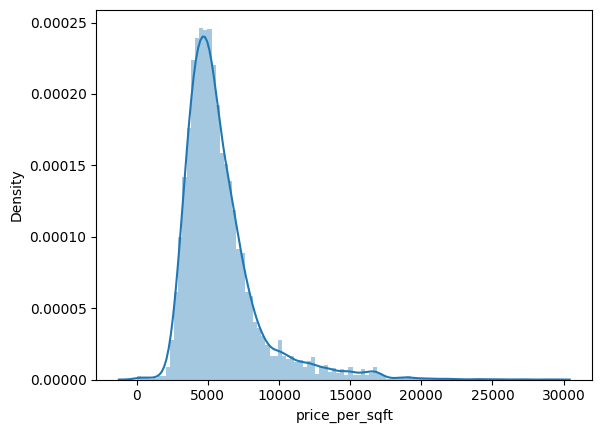

In [161]:
sns.distplot(df["price_per_sqft"], bins=100)

<Axes: ylabel='price_per_sqft'>

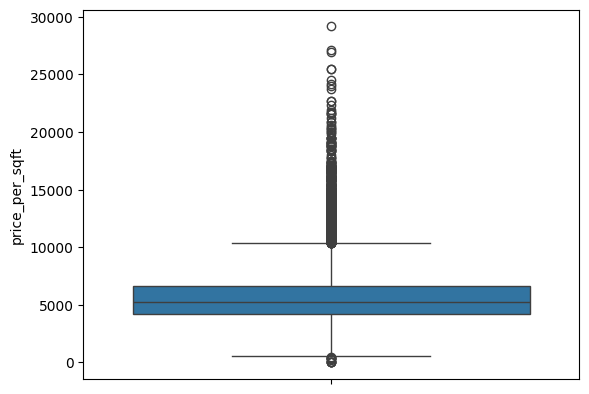

In [162]:
sns.boxplot(data=df['price_per_sqft'])

In [168]:
df[df.bath>= df.bedroom+3]

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
1633,flat,Built-up Area,Ready To Move,chikkabanavar,4,2460.0,7,2,3252.0,0.80,2460.0
6200,flat,Super built-up Area,Ready To Move,other,6,11338.0,9,1,8820.0,10.00,9637.3
9395,flat,Super built-up Area,Ready To Move,thanisandra,3,1806.0,6,2,6423.0,1.16,1535.1


In [171]:
df = df[df.bath < df.bedroom+3]

In [172]:
df.shape

(10626, 11)

In [176]:
df.head(10)

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
0,flat,Super built-up Area,Ready To Move,somasundara palya,2,1140.0,2,2,4035.0,0.46,969.00
1,flat,Super built-up Area,Under Construction,marathahalli,3,1305.0,2,1,5287.0,0.69,1109.25
2,flat,Super built-up Area,Ready To Move,chikkalasandra,3,1270.0,2,3,4331.0,0.55,1079.50
3,flat,Super built-up Area,Ready To Move,harlur,2,1290.0,2,1,6589.0,0.85,1096.50
4,flat,Built-up Area,Ready To Move,other,3,1503.0,2,2,6188.0,0.93,1503.00
5,flat,Super built-up Area,Ready To Move,hulimavu,3,1260.0,2,1,6508.0,0.82,1071.00
6,flat,Super built-up Area,Ready To Move,ambalipura,3,1607.0,2,2,6970.0,1.12,1365.95
7,flat,Super built-up Area,Ready To Move,sarjapur road,3,1181.0,2,1,5504.0,0.65,1003.85
8,flat,Built-up Area,Ready To Move,budigere,1,664.0,1,1,5120.0,0.34,664.00
9,flat,Super built-up Area,Ready To Move,pai layout,2,1400.0,2,2,4071.0,0.57,1190.00


In [175]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) 


In [177]:
df.to_csv('final_data.csv',index=False)